In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal
import core_tools as ct

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 1,
    "path": "../../",
    "exp_name": ct.generate_readable_short_id("Trees_Equal_Cov"),
    "split": "CV", #CV, random_split

    "cv_folds": 10,
    "plot": True,

    "calib_methods": ["RF_d", "RF_opt", "RF_large",
                    "Platt", "ISO", "Beta", "CRF", "VA",
                    "Rank"#, "Elkan", "tlr",                      
                    ],

    # "calib_methods": ["RF", 
    #                   "Platt", "ISO", "Beta", "CRF", "SVM_d", "LR_d"
    #                  ],
    
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    "class1_cov_min":4, 
    "class1_cov_max":5,
    "class2_cov_min":1, 
    "class2_cov_max":2, 



    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    "opt_cv":5, 
    "opt_n_iter":40,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    },

    # RF hyper opt
    "oob": False,
    "laplace": 0, # if set to 1, OOB must be false

    "exp_key": "n_estimators",
    "exp_values":  [1,2,3,4,5,10,20,50,100,200,500]
}

ct.save_params(params)

In [3]:
calib_results_dict, data_list = cx.run_exp(params["exp_key"], params["exp_values"], params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

Success in 2 n_features accuracy 0.745 runs 29
exp_param 1 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 2 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 3 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 4 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 5 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 10 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 20 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 50 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 100 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 200 done
Success in 2 n_features accuracy 0.745 runs 29
exp_param 500 done


In [4]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

LR_d


,RF,Platt,ISO,Beta,CRF,SVM_d,LR_d
Data,,,,,,,
1,0.418276,0.078505,0.170697,0.164617,0.420659,0.033004,0.006797
2,0.128711,0.057499,0.289797,0.097989,0.127966,0.033004,0.006797
3,0.056342,0.042698,0.334345,0.060029,0.057249,0.033004,0.006797
4,0.072939,0.040237,0.264024,0.074406,0.074917,0.033004,0.006797
5,0.044395,0.039575,0.260199,0.047378,0.044523,0.033004,0.006797
10,0.030916,0.033949,0.404499,0.036140,0.031059,0.033004,0.006797
20,0.027058,0.030572,0.374002,0.031050,0.026893,0.033004,0.006797
50,0.023787,0.028822,0.358426,0.027266,0.024538,0.033004,0.006797
100,0.022398,0.027087,0.337530,0.026165,0.022903,0.033004,0.006797


In [5]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

LR_d


,RF,Platt,ISO,Beta,CRF,SVM_d,LR_d
Data,,,,,,,
1,0.173532,0.173205,0.172899,0.187303,0.173367,0.157768,0.149617
2,0.164346,0.165596,0.169027,0.167213,0.164484,0.157768,0.149617
3,0.158405,0.160334,0.164784,0.160442,0.158936,0.157768,0.149617
4,0.159203,0.160725,0.165985,0.162650,0.160721,0.157768,0.149617
5,0.160322,0.162643,0.164738,0.164755,0.160709,0.157768,0.149617
10,0.153371,0.155791,0.162120,0.157695,0.153523,0.157768,0.149617
20,0.151486,0.154885,0.158750,0.155431,0.151280,0.157768,0.149617
50,0.152348,0.155301,0.161434,0.154775,0.152796,0.157768,0.149617
100,0.151680,0.154337,0.160638,0.154003,0.151759,0.157768,0.149617


In [6]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'Platt', 'ISO', 'Beta', 'CRF', 'SVM_d', 'LR_d']

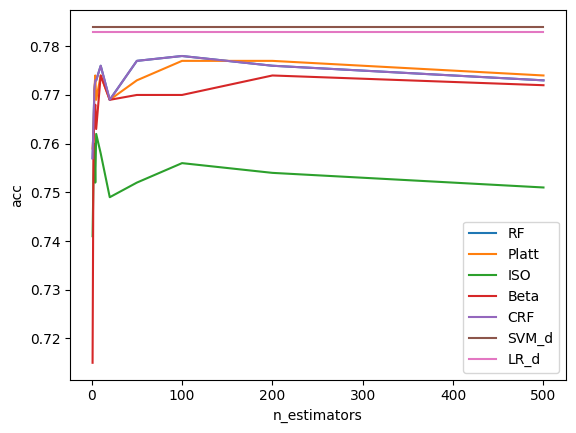

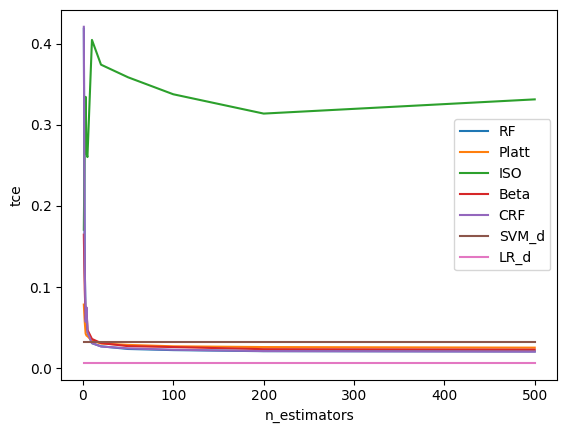

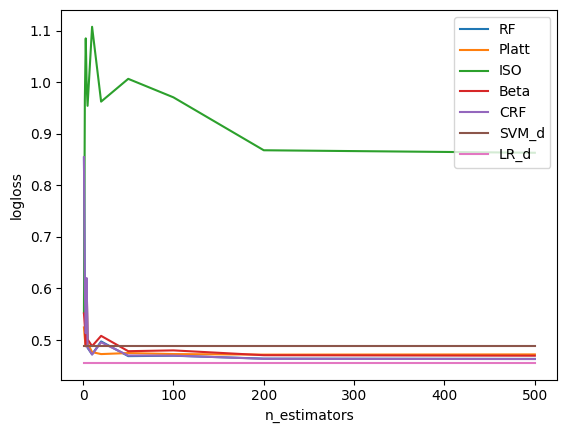

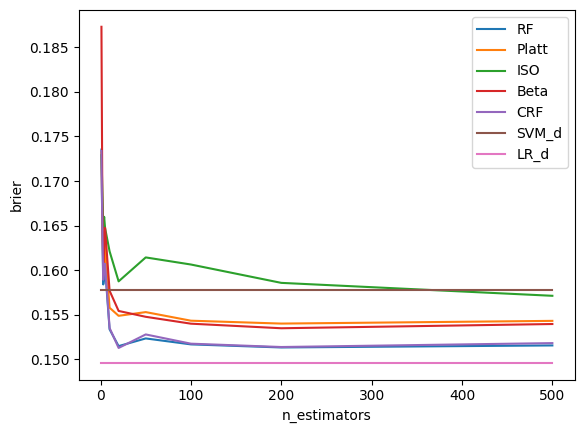

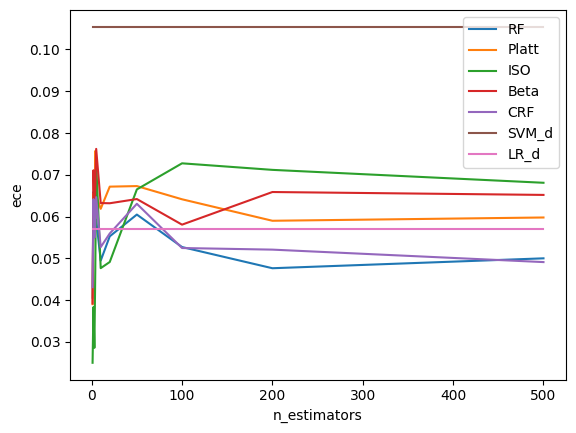

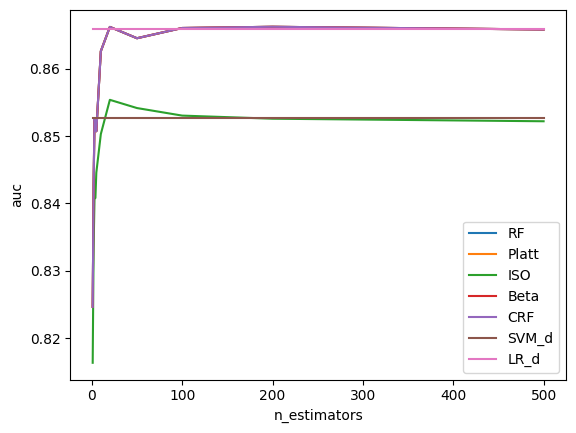

In [7]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(params["exp_key"])
    ax.set_ylabel(metric)